In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.graphics as smg
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Q1

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [29]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Initial Analysis

In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df1=df

In [6]:
df1=df1.rename({'R&D Spend':'RND','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
df1.head()

,RND,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


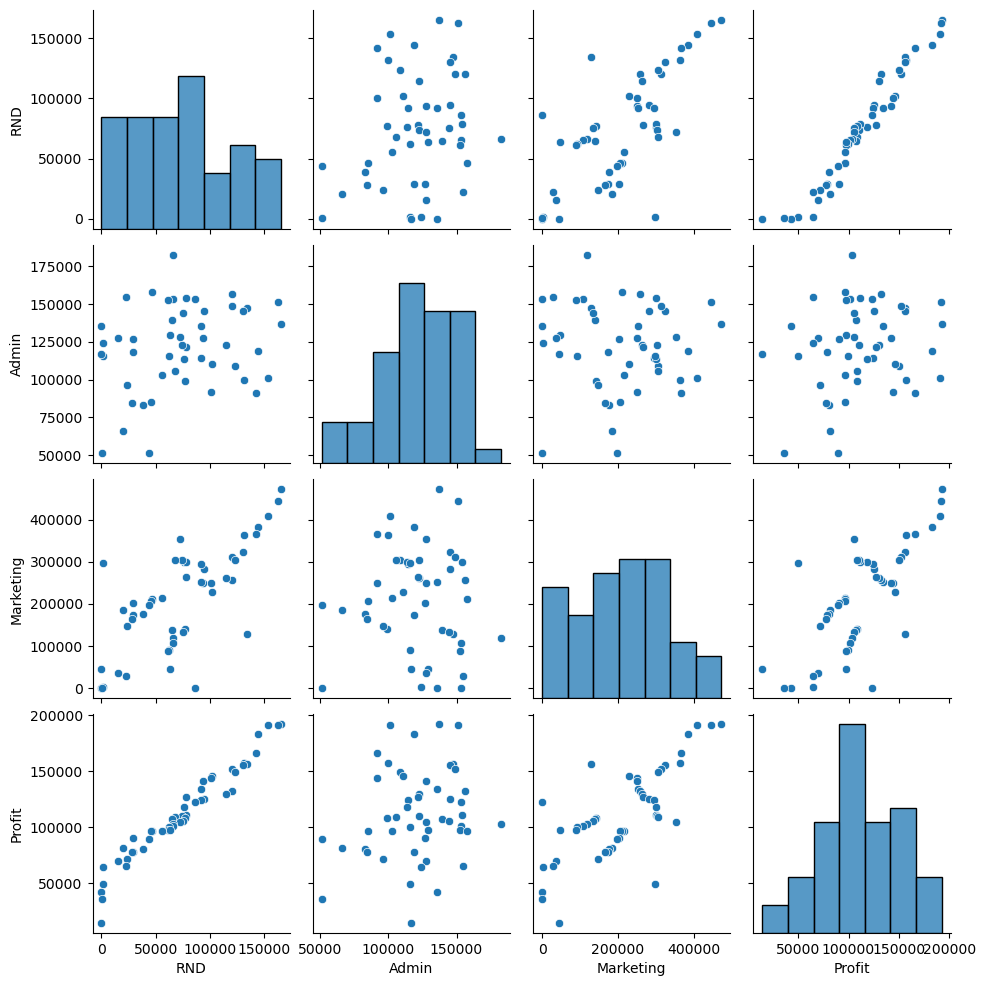

In [7]:
sns.pairplot(df1)

# Model Bulding

In [8]:
model1=smf.ols('Profit~RND+Admin+Marketing',data=df1).fit()

In [9]:
model1

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           4.53e-30
Time:                        20:05:54   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RND            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='color:green'>As p-values of Admin & Marketing are >0.05 there is no significance / they are insignificant values

<span style='color:green'>Therefore, including them in the regression model may not improve the model's predictive power significantly

## Collinearity check

checking for collinearity is an important step in any regression analysis 
to ensure that the results are valid and reliable

This can be done using various statistical methods such as correlation matrices,
<span style='color:red'>Variance inflation factors (VIF), and Eigenvalues.

In [11]:
col1=smf.ols(formula='RND~Admin+Marketing', data=df1).fit().rsquared
vif_r= 1/(1-col1)
col2=smf.ols(formula='Admin~RND+Marketing', data=df1).fit().rsquared
vif_a =1/(1-col2)
col3=smf.ols(formula='Marketing~RND+Admin', data=df1).fit().rsquared
vif_m =1/(1-col3)

In [12]:
pd.DataFrame({'Variables': ['RND','Admin','Marketing'],'VIF':[vif_r,vif_a,vif_m]})

,Variables,VIF
0,RND,2.468903
1,Admin,1.175091
2,Marketing,2.326773


A lower VIF value means that the estimated regression coefficients are more stable and reliable, and easier to interpret.

<span style='color:blue'>NONE OF THE ABOVE VARIABLES HAVE VIF>10, NO COLLINEARITY WE CAN CONSIDER ALL VARIABLES IN REGRESSION EQUATION

When the VIF is greater than 10, it is generally recommended to consider removing the variable from the model,or finding a way to reduce the collinearity between the predictor variables (e.g., by combining them or transforming them), in order to improve the stability and reliability of the regression model.

## Detecting influencers/outliers

### <span style='color:blue'> Cook’s Distance

It helps us understand if one or more observations have an outsized effect on the overall fit of the model. 
If Cook's distance for a particular data point is large, it means that this observation has a significant impact on the model's results and may be considered an outlier.
By identifying such outliers, we can better understand the data and improve the reliability of our regression analysis.

In [13]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

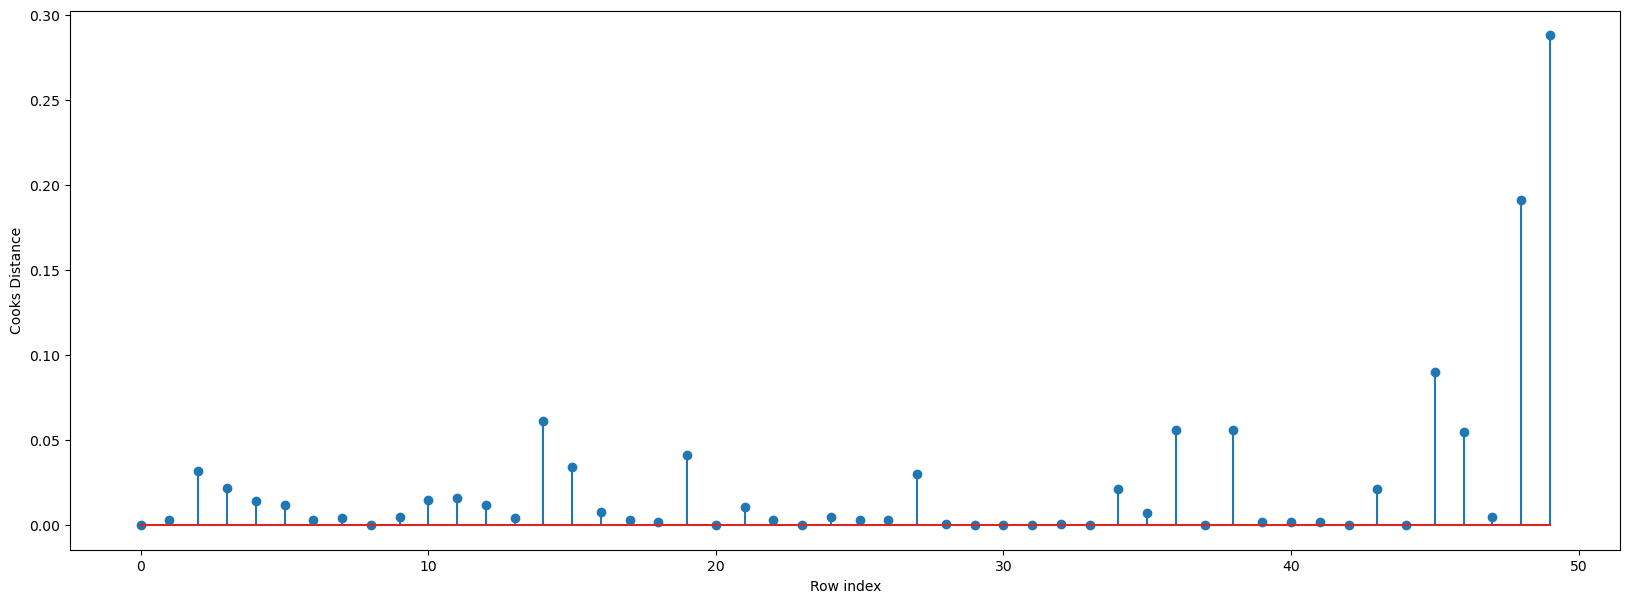

In [14]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [15]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.28808229275432584)

In [16]:
df1[df1.index.isin([49])]

,RND,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [17]:
df2=df1.drop(df1.index[[49]],axis=0).reset_index()

In [18]:
df2=df2.drop(['index'],axis=1)

In [19]:
df2.tail()

,RND,Admin,Marketing,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


# Model2

### <span style='color:green'> Predicting a new model, after removing the influencer at index 49

In [20]:
model2= smf.ols('Profit~RND+Admin+Marketing',data=df2).fit()

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           8.85e-32
Time:                        20:05:54   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RND            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the RMSE value

In [22]:
rmse1=np.sqrt(model1.mse_resid)

In [23]:
rmse1

9232.334837002692

In [24]:
rmse2=np.sqrt(model2.mse_resid)

In [25]:
rmse2

7753.807752288893

### Table of R-squared value for all model

In [26]:
data = {'Model':['Model1','Model2'],'R_Squared Value':(model1.rsquared,model2.rsquared),
     "RMSE":(rmse1,rmse2)}

In [27]:
pd.DataFrame(data)

,Model,R_Squared Value,RMSE
0,Model1,0.950746,9232.334837
1,Model2,0.961316,7753.807752


### Inference:

R-Squared value increased in final model, Therefore it states that the higher the R-Squared the better the model fits your data